In [1]:
import nltk

In [2]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pavel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords

stopwords.words('russian')[0:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pavel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem

ModuleNotFoundError: No module named 'pymystem3'

In [ ]:
# Скачиваем необходимые ресурсы один раз
#nltk.download('punkt')
#nltk.download('stopwords')

# Инициализируем лемматизатор один раз (это тяжелый объект)
lemmatizer = Mystem()

# Загружаем стоп-слова один раз
RUSSIAN_STOPWORDS = set(stopwords.words('russian'))

def clean_text(text):
    """Очистка текста от лишних символов"""
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление HTML-тегов
    text = re.sub(r'<.*?>', '', text)
    
    # Удаление URL
    text = re.sub(r'http\S+', '', text)
    
    # Удаление упоминаний и хештегов
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # Удаление цифр и специальных символов
    text = re.sub(r'[^a-zA-Zа-яА-Я\s]', '', text)
    
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_text(text):
    """Токенизация текста"""
    return nltk.word_tokenize(text)

def remove_stopwords(tokens, language='russian'):
    """Удаление стоп-слов"""
    stopwords_set = RUSSIAN_STOPWORDS
    return [token for token in tokens if token not in stopwords_set]

def lemmatize_tokens(tokens, language='russian'):
    """Лемматизация токенов"""
    text = ' '.join(tokens)
    lemmas = lemmatizer.lemmatize(text)
    return [lemma.strip() for lemma in lemmas if lemma.strip()]


def preprocess_text(text, language='russian'):
    """Полный пайплайн предобработки одной функцией"""
    # Очистка
    cleaned_text = clean_text(text)
    
    # Токенизация
    tokens = tokenize_text(cleaned_text)
    
    # Удаление стоп-слов
    filtered_tokens = remove_stopwords(tokens, language)
    
    # Лемматизация
    lemmatized_tokens = lemmatize_tokens(filtered_tokens, language)
    
    return ' '.join(lemmatized_tokens)

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Скачиваем стоп-слова если нужно
#nltk.download('stopwords')

# Пути к папкам (замените на ваши реальные пути)
base_path = "C:/Users/Pavel/jupyter_progs/NLP_progs/first_NLP"  # например: "C:/Users/User/kinopoisk_reviews"
neg_path = os.path.join(base_path, "neg")
pos_path = os.path.join(base_path, "pos")
neu_path = os.path.join(base_path, "neu")

def load_texts_from_folder(folder_path, label):
    """Загружает все txt файлы из папки и возвращает список с меткой"""
    texts = []
    labels = []
    
    if not os.path.exists(folder_path):
        print(f"Папка {folder_path} не существует!")
        return texts, labels
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read().strip()
                    if text:  # проверяем, что файл не пустой
                        texts.append(text)
                        labels.append(label)
            except Exception as e:
                print(f"Ошибка при чтении файла {filename}: {e}")
    
    print(f"Загружено {len(texts)} отзывов из папки {folder_path}")
    return texts, labels

# Загружаем данные из всех папок
neg_texts, neg_labels = load_texts_from_folder(neg_path, "negative")
pos_texts, pos_labels = load_texts_from_folder(pos_path, "positive") 
neu_texts, neu_labels = load_texts_from_folder(neu_path, "neutral")

# Объединяем все в один DataFrame
all_texts = neg_texts + pos_texts + neu_texts
all_labels = neg_labels + pos_labels + neu_labels

df = pd.DataFrame({
    'text': all_texts,
    'sentiment': all_labels
})

print(f"Общий размер датасета: {len(df)}")
print("\nРаспределение классов:")
print(df['sentiment'].value_counts())

Загружено 19827 отзывов из папки C:/Users/Pavel/jupyter_progs/NLP_progs/first_NLP\neg
Загружено 87138 отзывов из папки C:/Users/Pavel/jupyter_progs/NLP_progs/first_NLP\pos
Загружено 24704 отзывов из папки C:/Users/Pavel/jupyter_progs/NLP_progs/first_NLP\neu
Общий размер датасета: 131669

Распределение классов:
sentiment
positive    87138
neutral     24704
negative    19827
Name: count, dtype: int64


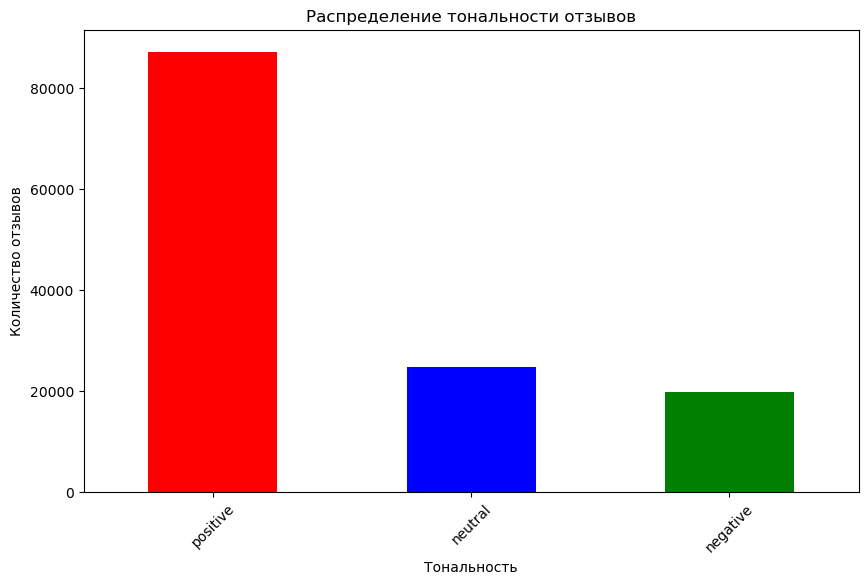


Примеры отзывов:

NEGATIVE:
В 2003-ем году под руководством малоизвестного режиссёра Кларка Джонсона студия 'Columbia Pictures' решилась на полнометражную экранизацию сериала 'Спецназ' (в оригинале 'S.W.A.T.) с Сэмюелем Л. Джекс...

POSITIVE:
Что делать, если любовница занимается организацией твоей свадьбы? Молиться, чтобы она не подружилась с невестой. У Матиаса осталось совсем мало времени, чтобы выбрать из двух девушек — одну.

От просм...

NEUTRAL:
Очередная французская комедия о свадьбе, которая придется по душе всем поклонникам романтических комедий с легкой ноткой мелодраматизма. Этот фильм явно входит в список новых тенденций, когда актёр ил...


In [4]:
# Визуализируем распределение классов
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Распределение тональности отзывов')
plt.xlabel('Тональность')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)
plt.show()

# Посмотрим на примеры отзывов
print("\nПримеры отзывов:")
for sentiment in df['sentiment'].unique():
    print(f"\n{sentiment.upper()}:")
    sample_text = df[df['sentiment'] == sentiment]['text'].iloc[0]
    print(sample_text[:200] + "..." if len(sample_text) > 200 else sample_text)

In [5]:
# Инициализируем инструменты для русского языка
stop_words = set(stopwords.words('russian'))
stemmer = SnowballStemmer('russian')

def preprocess_russian_text(text):
    """Функция для предобработки русского текста"""
    if not isinstance(text, str):
        return ""
    
    # 1. Приведение к нижнему регистру
    text = text.lower()
    
    # 2. Удаление всего, кроме букв и пробелов
    text = re.sub(r'[^а-яё\s]', ' ', text)
    
    # 3. Замена нескольких пробелов одним
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 4. Токенизация и фильтрация
    words = text.split()
    
    # 5. Удаление стоп-слов и стемминг
    processed_words = []
    for word in words:
        if word not in stop_words and len(word) > 2:
            # Стемминг может быть агрессивным, можно закомментировать для тестов
            stemmed_word = stemmer.stem(word)
            processed_words.append(stemmed_word)
    
    return ' '.join(processed_words)

# Применяем предобработку
print("Начинаем предобработку текстов...")
df['processed_text'] = df['text'].apply(preprocess_russian_text)
print("Предобработка завершена!")

# Посмотрим на результат предобработки
print("\nДо и после предобработки:")
sample_idx = 0
print("ОРИГИНАЛ:", df['text'].iloc[sample_idx][:100] + "...")
print("ОБРАБОТАННЫЙ:", df['processed_text'].iloc[sample_idx][:100] + "...")

Начинаем предобработку текстов...
Предобработка завершена!

До и после предобработки:
ОРИГИНАЛ: В 2003-ем году под руководством малоизвестного режиссёра Кларка Джонсона студия 'Columbia Pictures' ...
ОБРАБОТАННЫЙ: год руководств малоизвестн режиссер кларк джонсон студ реш полнометражн экранизац сериа спецназ ориг...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Кодируем метки в числовой формат
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

print("Соответствие меток:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

# Разделяем на обучающую и тестовую выборки
X = df['processed_text']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Векторизация с помощью TF-IDF
print("Векторизация текстов...")
tfidf = TfidfVectorizer(
    max_features=10000,  # можно поэкспериментировать с этим параметром
    min_df=5,           # игнорировать слова, встречающиеся реже чем в 5 документах
    max_df=0.7,         # игнорировать слова, встречающиеся в более чем 70% документов
    ngram_range=(1, 2)  # учитывать не только отдельные слова, но и пары слов
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Размер обучающей выборки: {X_train_tfidf.shape}")
print(f"Размер тестовой выборки: {X_test_tfidf.shape}")

Соответствие меток:
negative: 0
neutral: 1
positive: 2
Векторизация текстов...
Размер обучающей выборки: (105335, 10000)
Размер тестовой выборки: (26334, 10000)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Обучение логистической регрессии...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'  # для многоклассовой классификации
)
lr_model.fit(X_train_tfidf, y_train)

# Предсказания
y_pred_lr = lr_model.predict(X_test_tfidf)

# Оценка качества
print("Логистическая регрессия:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nДетальный отчет:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Обучение логистической регрессии...
Логистическая регрессия:
Accuracy: 0.7698

Детальный отчет:
              precision    recall  f1-score   support

    negative       0.70      0.64      0.67      3965
     neutral       0.49      0.28      0.35      4941
    positive       0.82      0.94      0.88     17428

    accuracy                           0.77     26334
   macro avg       0.67      0.62      0.63     26334
weighted avg       0.74      0.77      0.75     26334



Матрица ошибок для логистической регрессии:


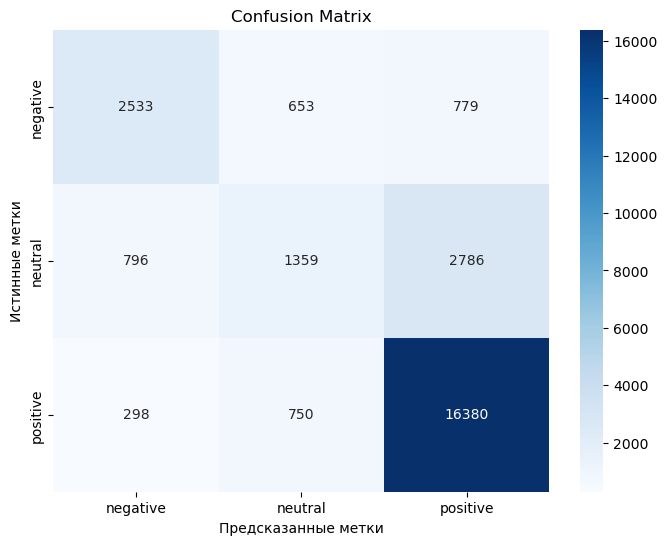

In [8]:
# Матрица ошибок для лучшей модели
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')
    plt.show()

print("Матрица ошибок для логистической регрессии:")
plot_confusion_matrix(y_test, y_pred_lr, label_encoder.classes_)

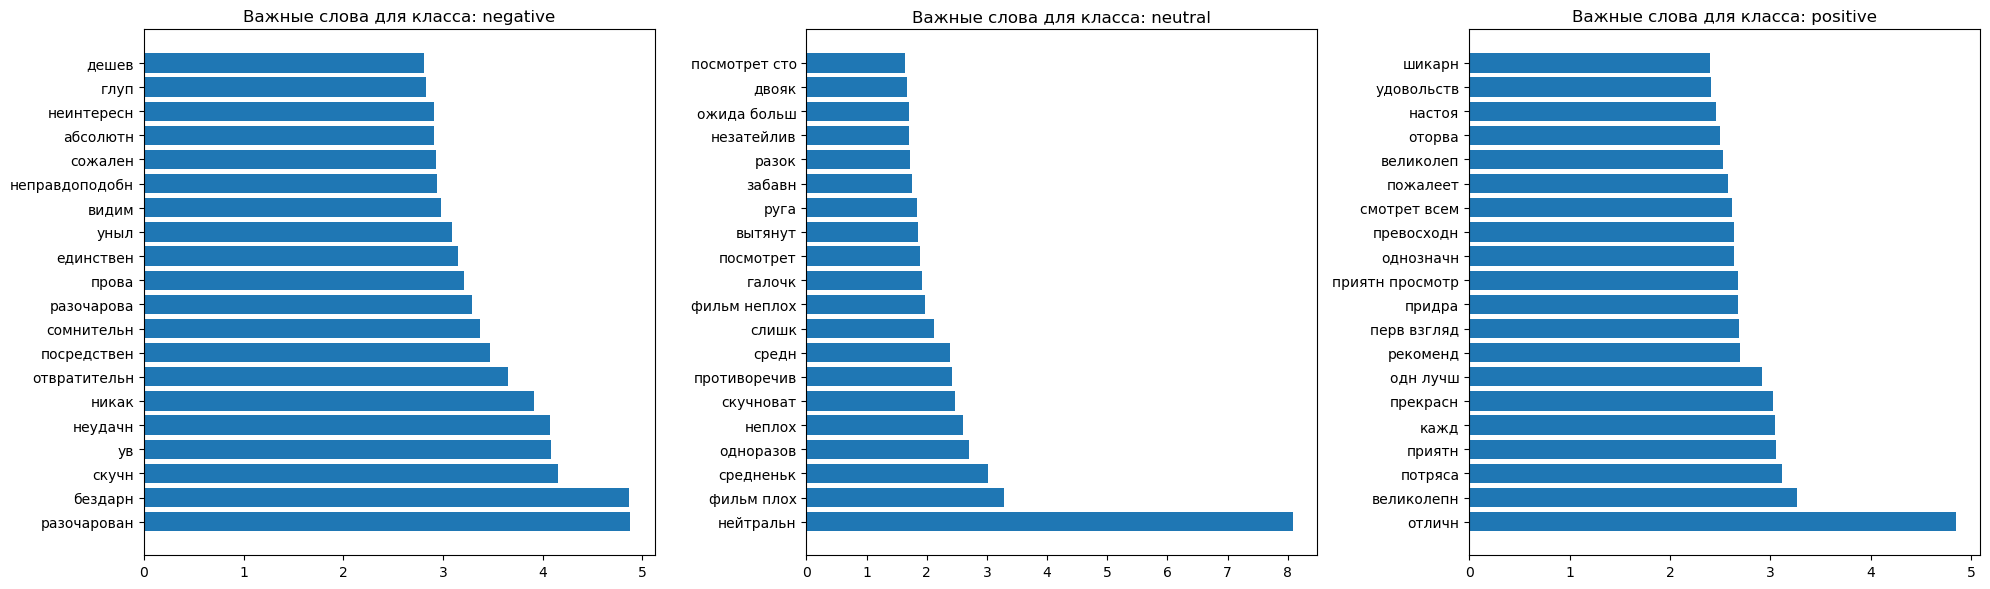

In [9]:
# Посмотрим на самые важные слова для каждого класса
def plot_top_features(model, feature_names, n_top_features=20):
    if hasattr(model, 'coef_'):
        fig, axes = plt.subplots(1, len(model.coef_), figsize=(20, 6))
        if len(model.coef_) == 1:
            axes = [axes]
        
        for i, (class_label, coef) in enumerate(zip(label_encoder.classes_, model.coef_)):
            # Сортируем коэффициенты по важности
            top_indices = coef.argsort()[-n_top_features:][::-1]
            top_features = [feature_names[j] for j in top_indices]
            top_scores = coef[top_indices]
            
            axes[i].barh(range(len(top_features)), top_scores)
            axes[i].set_yticks(range(len(top_features)))
            axes[i].set_yticklabels(top_features)
            axes[i].set_title(f'Важные слова для класса: {class_label}')
        
        plt.tight_layout()
        plt.show()

# Получаем названия признаков (слов)
feature_names = tfidf.get_feature_names_out()
plot_top_features(lr_model, feature_names)